In [1]:
import streamlit as st
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


In [4]:
df=pd.read_csv("https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/Company.csv",sep=",")

In [5]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [30]:
X=df.drop(columns='Sales')

In [31]:
y=df['Sales']

In [32]:
X

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [33]:
y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

In [34]:
#ora applico il modello su dati di test e train e li confornto. I dati di test sono dati che non ha mai
# visto
from sklearn.model_selection import train_test_split

In [35]:
from sklearn.linear_model import LinearRegression
model=LinearRegression() #creo un modello con regressione lineare

In [36]:
model #creato ma senza valori

LinearRegression()

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.25, 
                                                    random_state = 667
                                                    )

In [38]:
X_train.shape, X_test.shape

((150, 3), (50, 3))

In [39]:
model.fit(X_train,y_train)

LinearRegression()

In [40]:
y_pred=model.predict(X_test)

In [41]:
import pandas as pd
pd.DataFrame(list(zip(y_pred,y_test)))

,0,1
0,20.245939,22.4
1,13.228982,13.2
2,9.805465,10.1
3,9.398666,9.7
4,13.714383,14.6
5,10.257531,10.5
6,18.223776,18.4
7,20.964373,21.5
8,9.758959,10.1
9,10.560003,11.3


In [42]:
res_df = pd.DataFrame(data=list(zip(y_pred, y_test)),columns=['predicted', 'real'])
res_df

,predicted,real
0,20.245939,22.4
1,13.228982,13.2
2,9.805465,10.1
3,9.398666,9.7
4,13.714383,14.6
5,10.257531,10.5
6,18.223776,18.4
7,20.964373,21.5
8,9.758959,10.1
9,10.560003,11.3


In [43]:
res_df['error'] = res_df['real'] - res_df['predicted']
res_df

,predicted,real,error
0,20.245939,22.4,2.154061
1,13.228982,13.2,-0.028982
2,9.805465,10.1,0.294535
3,9.398666,9.7,0.301334
4,13.714383,14.6,0.885617
5,10.257531,10.5,0.242469
6,18.223776,18.4,0.176224
7,20.964373,21.5,0.535627
8,9.758959,10.1,0.341041
9,10.560003,11.3,0.739997


'Il primo pezzo di codice assegna alla variabile "length" la lunghezza della prima dimensione dell\'array "y_pred" (ovvero il numero di righe \npresenti nell\'array).\nIl secondo pezzo di codice crea un array di numeri equidistanti che ha come lunghezza proprio quella assegnata in precedenza alla variabile\n "length", e tale array viene poi assegnato alla variabile "x". In altre parole, "x" sarà un array di numeri che vanno da 0 a "length-1", \n con passo 1.'

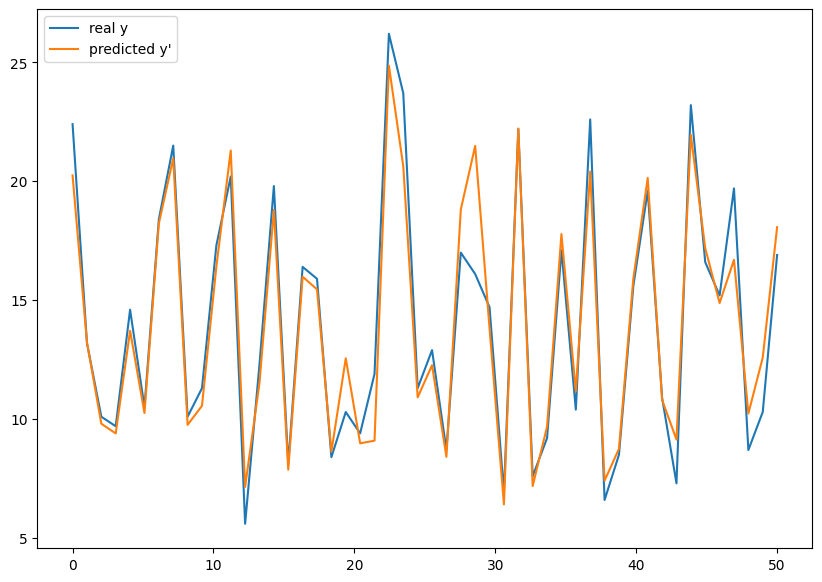

In [44]:
length = y_pred.shape[0] #  
x = np.linspace(0,length,length)

plt.figure(figsize=(10,7))
plt.plot(x, y_test, label='real y')
plt.plot(x, y_pred, label="predicted y'")
plt.legend(loc=2);
'''Il primo pezzo di codice assegna alla variabile "length" la lunghezza della prima dimensione dell'array "y_pred" (ovvero il numero di righe 
presenti nell'array).
Il secondo pezzo di codice crea un array di numeri equidistanti che ha come lunghezza proprio quella assegnata in precedenza alla variabile
 "length", e tale array viene poi assegnato alla variabile "x". In altre parole, "x" sarà un array di numeri che vanno da 0 a "length-1", 
 con passo 1.'''

In [45]:
#misuro l'errore del mio modello
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error 
r2score= r2_score(y_test, y_pred)
mae=mean_absolute_error(y_test, y_pred)
mse=mean_squared_error(y_test, y_pred)
rmse=mean_squared_error(y_test,y_pred,squared=False)

print('R2_score:', r2score)
print('MAE:',mae)
print('MSE:',mse)
print('RMSE',rmse)

R2_score: 0.9274375923929481
MAE: 1.0121369722775748
MSE: 2.042193206946934
RMSE 1.4290532554621378


In [46]:
model.coef_


array([0.05448786, 0.09941409, 0.00304925])

In [47]:

model.intercept_


4.6956531822755405

In [48]:
model.predict([[324,34,56]])[0] #faccio previsione con 3 dati di input sul modello creato

c:\Users\ifoa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


25.90055760570833

In [49]:
import joblib
## to save a model , salvo un modello in file pkl
joblib.dump(model,'regression_test_company.pkl')

['regression_test_company.pkl']

In [50]:
## to load model, carico il modello 
newmodel1 = joblib.load('regression_test_company.pkl')
newmodel1

LinearRegression()

In [51]:
newmodel.predict([[324,34,56]])[0] 
#faccio inferenza con il nuovo modello, ossia previsione inserendo 3 input

c:\Users\ifoa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


25.90055760570833